# Preprocessament de dades

In [1]:
# importem llibreries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Carregar les dades

data = pd.read_csv("customer_data.csv")
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [3]:
# Veiem informació
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Veiem descripció i estadístiques de les dades
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [5]:
# normalitzem dades
escalador = MinMaxScaler()
dades_escalades = escalador.fit_transform(data[["Edad","Ingresos Anuales (k$)","Puntuación de Gasto (1-100)"]])
dades_escalades

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

# Reducció de dimensions: PCA i SVD

In [6]:
# Apliquem PCA
pca = PCA(n_components=2)
pca_resultats = pca.fit_transform(dades_escalades)

In [7]:
#Apliquem SVD
U, sigma, VT = np.linalg.svd(dades_escalades)

In [8]:
# Seleccionem les dues primeres components singulars per reduir les dimensions
k = 2
svd_resultats = U[:,:k] * sigma[:k]

# Clustering K-means i clusters Jeràrquics

In [9]:
# Apliquem K-means

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(dades_escalades)

C:\Users\tvive\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tvive\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tvive\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\tvive\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

In [10]:
# Apliquem clustering jeràrquic
linked = linkage(dades_escalades, method="ward")

# Visualització de les dades

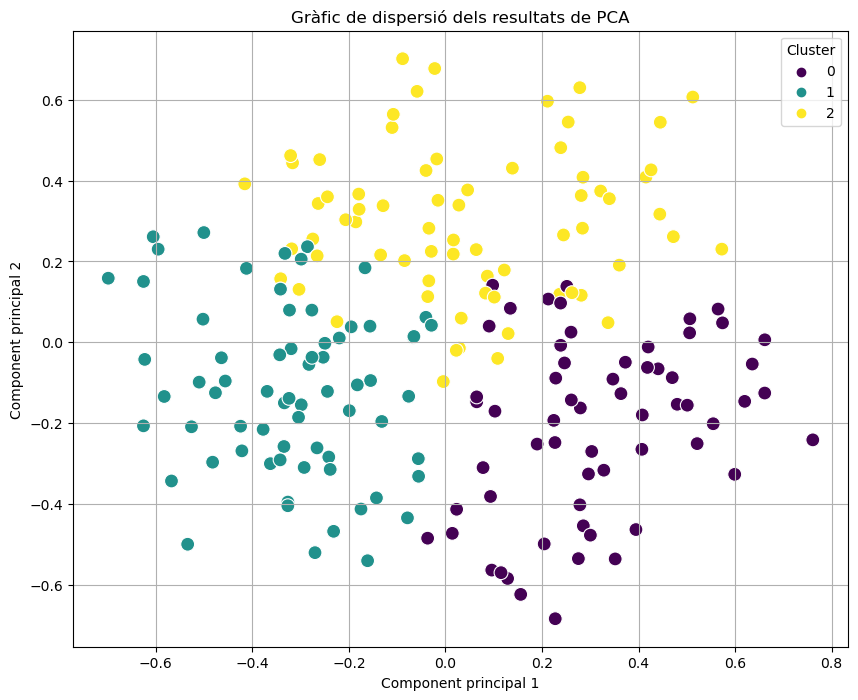

In [11]:
# Gràfic de dispersió pels resultats de PCA
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_resultats[:,0], y= pca_resultats[:,1], hue=kmeans_clusters,palette="viridis", s=100)
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.title("Gràfic de dispersió dels resultats de PCA")
plt.legend(title="Cluster")
plt.grid(True);

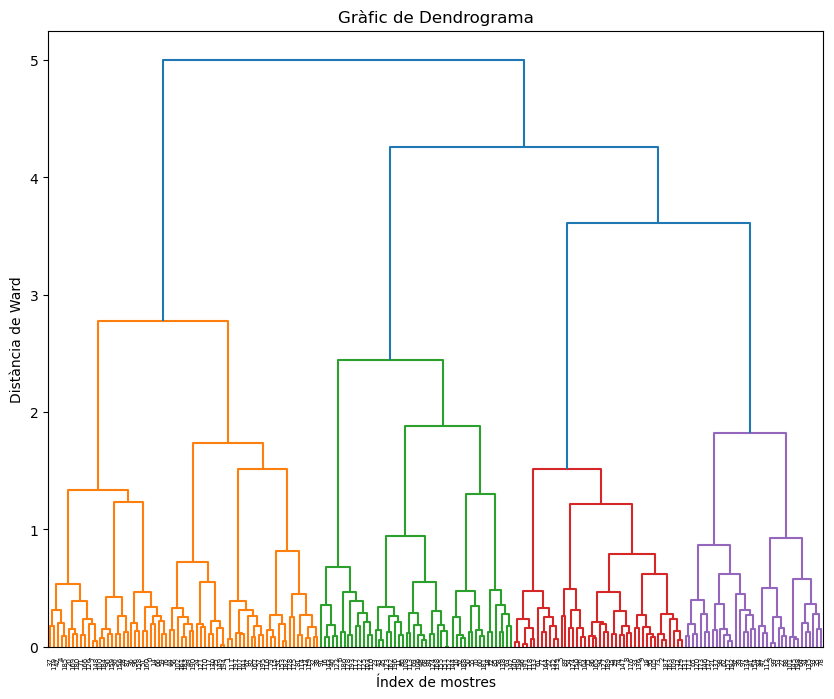

In [12]:
# Crear un dendrograma
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.xlabel("Índex de mostres")
plt.ylabel("Distància de Ward")
plt.title("Gràfic de Dendrograma")
plt.axhline(y = 10, color="r", linestyle = "--");

# Interpretació i estrategia de marqueting basades en clusters

In [13]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media

# Análisis de clusters para determinar estrategias
cluster_info = pd.DataFrame({
    'Cluster': kmeans_clusters,
    'Edad': data['Edad'],
    'Ingresos': data['Ingresos Anuales (k$)'],
    'Gasto': data['Puntuación de Gasto (1-100)']
})

# Descripción de cada cluster
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f" - Edad Media: {cluster_data['Edad'].mean():.0f}")
    print(f" - Ingresos Medios: {cluster_data['Ingresos'].mean():.2f}")
    print(f" - Puntuación de Gasto Media: {cluster_data['Gasto'].mean():.2f}")
    print()


Cluster 0:
 - Edad Media: 58
 - Ingresos Medios: 90.92
 - Puntuación de Gasto Media: 62.23

Cluster 1:
 - Edad Media: 45
 - Ingresos Medios: 46.01
 - Puntuación de Gasto Media: 26.10

Cluster 2:
 - Edad Media: 29
 - Ingresos Medios: 74.62
 - Puntuación de Gasto Media: 63.17



# Estrateiges de marketing per cada cluster

#### Cluster 0: Clientes Mayores con Altos Ingresos y Gasto Moderado

**Estrategia Propuesta:**
1. **Productos Premium y de Lujo:** Dada la combinación de alta edad e ingresos elevados, este grupo podría estar interesado en productos o servicios de alta calidad y lujo. La oferta podría incluir artículos exclusivos o de edición limitada.
2. **Comunicación Personalizada y Directa:** Considerar el uso de medios tradicionales (como correo postal personalizado o llamadas telefónicas) combinados con estrategias digitales como emails personalizados. El enfoque debe ser sofisticado y directo, respetando su madurez y experiencia de compra.
3. **Programas de Fidelidad:** Crear o mejorar los programas de fidelidad que ofrecen beneficios exclusivos, descuentos en productos premium, y servicios especiales como entregas prioritarias o acceso anticipado a nuevos productos.

#### Cluster 1: Clientes de Edad Media con Ingresos y Gastos Bajos

**Estrategia Propuesta:**
1. **Ofertas y Descuentos:** Este segmento parece ser más sensible al precio debido a sus ingresos más bajos y baja puntuación de gasto. Las campañas promocionales, descuentos y cupones podrían ser efectivos para impulsar las compras.
2. **Marketing de Contenido Educativo:** Proporcionar contenido que eduque sobre la relación costo-beneficio de los productos, ayudando a este grupo a tomar decisiones de compra informadas que maximicen el valor por su dinero.
3. **Programas de Recompensa por Referencias:** Incentivar a los clientes a referir amigos y familiares a cambio de beneficios, lo cual puede ayudar a expandir la base de clientes de manera orgánica y a bajo costo.

#### Cluster 2: Clientes Jóvenes con Ingresos Moderados y Gasto Alto

**Estrategia Propuesta:**
1. **Marketing Digital Intensivo:** Dado que este grupo es joven y activo en compras, es crucial usar plataformas digitales para el marketing. Redes sociales, publicidad online, y campañas de influencer marketing pueden ser muy efectivas.
2. **Productos y Servicios Innovadores:** Ofrecer productos tecnológicos, de moda, y otros bienes que apelen a un estilo de vida dinámico y moderno.
3. **Experiencias y Eventos Exclusivos:** Organizar eventos o experiencias exclusivas que puedan atraer a este grupo demográfico, como lanzamientos de productos, concursos o meet-ups que les permitan interactuar con la marca de manera significativa.

### Justificación:
Las estrategias están diseñadas para alinearse con las características y preferencias de cada grupo:
- **Cluster 0** se enfoca en la calidad y exclusividad, apropiado para su capacidad de gasto y preferencias de consumo maduro.
- **Cluster 1** se centra en maximizar el valor y accesibilidad, crucial para clientes con menor liquidez.
- **Cluster 2** aprovecha su familiaridad con la tecnología y tendencias, usando canales y ofertas que resuenen con su estilo de vida activo y moderno.

Estas estrategias no solo buscan aumentar las ventas, sino también mejorar la satisfacción y fidelización del cliente, creando una conexión más profunda y duradera con la marca.